<a href="https://colab.research.google.com/github/xiaorui777/CV/blob/master/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 关于Pytorch

## Pytorch 和 Numpy 的对比

In [0]:
import torch
import numpy as np

In [22]:
np_data = np.arange(6).reshape((2,3))

# numpy 转 torch 形式
torch_data = torch.from_numpy(np_data)
# torch 转 numpy 形式
tensor2array = torch_data.numpy()

print(
    '\nnumpy：','\n',np_data,
    '\ntorch：','\n',torch_data,
    '\n转回numpy：','\n',tensor2array
)


numpy： 
 [[0 1 2]
 [3 4 5]] 
torch： 
 tensor([[0, 1, 2],
        [3, 4, 5]]) 
转回numpy： 
 [[0 1 2]
 [3 4 5]]


## Pytorch 数学运算
### 绝对值（abs）

In [0]:
# abs 绝对值
data = [-1,-2,1,2]
data_abs = np.abs(data)

tensor = torch.FloatTensor(data)  # 32bit
tensor_abs = torch.abs(tensor)

In [21]:
print(
    '\nnumpy：',data,
    '\ntorch：',tensor
)


numpy： [-1, -2, 1, 2] 
torch： tensor([-1., -2.,  1.,  2.])


In [23]:
print(
    '\nnumpy的绝对值：',data_abs,
    '\ntorch的绝对值：',tensor_abs
)


numpy的绝对值： [1 2 1 2] 
torch的绝对值： tensor([1., 2., 1., 2.])


### 矩阵运算

In [0]:
data = [[1,2],[3,4]]
tensor = torch.FloatTensor(data)

# 矩阵相乘
data_matmul = np.matmul(data,data)

# torch接受的都是tensor形式，注意定义的时候转换
tensor_matmal = torch.mm(tensor,tensor)

In [32]:
print(
    '\nnumpy:','\n',data_matmul,
    '\ntorch:','\n',tensor_matmal
)


numpy: 
 [[ 7 10]
 [15 22]] 
torch: 
 tensor([[ 7., 10.],
        [15., 22.]])


## 变量（Variable）

In [0]:
from torch.autograd import Variable

In [0]:
# tensor形式不能反向传播
tensor = torch.FloatTensor([[1,2],[3,4]])

# 把tensor放入变量中，variable形式可以反向传播
# 可以把tensor想像成鸡蛋，variable就是装鸡蛋的篮子
# requires_grad=True 即计算该变量的梯度，False不计算
variable = Variable(tensor,requires_grad=True)

In [36]:
print(
    '\ntensor形式:','\n',tensor,
    '\nVariable形式:','\n',variable
)


tensor形式: 
 tensor([[1., 2.],
        [3., 4.]]) 
Variable形式: 
 tensor([[1., 2.],
        [3., 4.]], requires_grad=True)


In [0]:
# 求均值
t_out = torch.mean(tensor*tensor)
v_out = torch.mean(variable*variable) # x^2

In [43]:
variable*variable

tensor([[ 1.,  4.],
        [ 9., 16.]], grad_fn=<MulBackward0>)

In [38]:
print(
    '\ntensor mean:','\n',t_out,
    '\nVariable mean:','\n',v_out
)


tensor mean: 
 tensor(7.5000) 
Variable mean: 
 tensor(7.5000, grad_fn=<MeanBackward0>)


In [0]:
# 反向传播
# v_out = 1/4*sum(var*var)
# d(v_out)/d(var) = 1/4*2*variable = variable/2
v_out.backward()

In [42]:
# 打印反向传播的值(梯度)
print(variable.grad)

tensor([[0.5000, 1.0000],
        [1.5000, 2.0000]])


In [44]:
# variable的其他属性：data
print(variable.data)

tensor([[1., 2.],
        [3., 4.]])


In [45]:
# variable.data = tensor形式
# variable 不能直接转 numpy，只有tensor可以转
print(variable.data.numpy())

[[1. 2.]
 [3. 4.]]


## 激励函数（activation func）

In [0]:
import torch
import torch.nn.functional as func
from torch.autograd import Variable
import matplotlib.pyplot as plt

In [0]:
# 生成数据
x = torch.linspace(-5,5,200)

In [50]:
x

tensor([-5.0000, -4.9497, -4.8995, -4.8492, -4.7990, -4.7487, -4.6985, -4.6482,
        -4.5980, -4.5477, -4.4975, -4.4472, -4.3970, -4.3467, -4.2965, -4.2462,
        -4.1960, -4.1457, -4.0955, -4.0452, -3.9950, -3.9447, -3.8945, -3.8442,
        -3.7940, -3.7437, -3.6935, -3.6432, -3.5930, -3.5427, -3.4925, -3.4422,
        -3.3920, -3.3417, -3.2915, -3.2412, -3.1910, -3.1407, -3.0905, -3.0402,
        -2.9899, -2.9397, -2.8894, -2.8392, -2.7889, -2.7387, -2.6884, -2.6382,
        -2.5879, -2.5377, -2.4874, -2.4372, -2.3869, -2.3367, -2.2864, -2.2362,
        -2.1859, -2.1357, -2.0854, -2.0352, -1.9849, -1.9347, -1.8844, -1.8342,
        -1.7839, -1.7337, -1.6834, -1.6332, -1.5829, -1.5327, -1.4824, -1.4322,
        -1.3819, -1.3317, -1.2814, -1.2312, -1.1809, -1.1307, -1.0804, -1.0302,
        -0.9799, -0.9296, -0.8794, -0.8291, -0.7789, -0.7286, -0.6784, -0.6281,
        -0.5779, -0.5276, -0.4774, -0.4271, -0.3769, -0.3266, -0.2764, -0.2261,
        -0.1759, -0.1256, -0.0754, -0.02

In [0]:
# 把 torch 数据转换成 Variable
x = Variable(x)

In [0]:
# matplotlib 无法识别 variable 数据类型，所以要把其转换成 numpy
# variable 的 tensor 是存在 data 中的，所以是 x.data
x_np = x.data.numpy()

In [0]:
# 激励函数
y_relu = torch.relu(x).data.numpy()
y_sigmoid = torch.sigmoid(x).data.numpy()
y_tanh = torch.tanh(x).data.numpy()

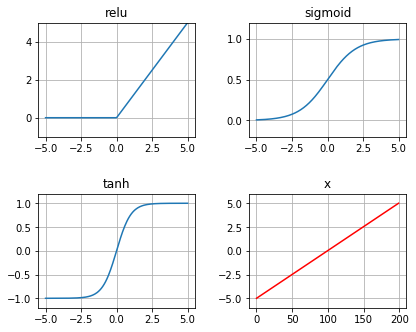

In [100]:
%matplotlib inline  
plt.figure()

plt.subplot(221)
plt.plot(x_np,y_relu)
plt.title('relu')
plt.ylim((-1,5))
plt.grid(True)  # 网格

plt.subplot(2,2,2)
plt.plot(x_np,y_sigmoid)
plt.title('sigmoid')
plt.ylim((-0.2,1.2))
plt.grid(True)

plt.subplot(2,2,3)
plt.plot(x_np,y_tanh)
plt.title('tanh')
plt.ylim((-1.2,1.2))
plt.grid(True)

plt.subplot(2,2,4)
plt.plot(x_np,c='red') # 可以更改颜色
plt.title('x')
plt.ylim((-6,6))
plt.grid(True)

plt.subplots_adjust(top=1, bottom=0.01, left=0.10, right=0.95, hspace=0.5,
                    wspace=0.35)



## 回归问题

In [0]:
# 生成数据
# unsqueeze是把一维的数据变成2维的数据，只能处理2维
x = torch.unsqueeze(torch.linspace(-1,1,100),dim=1)
y = x.pow(2) + 0.2*torch.rand(x.size())

In [0]:
x,y = Variable(x),Variable(y)

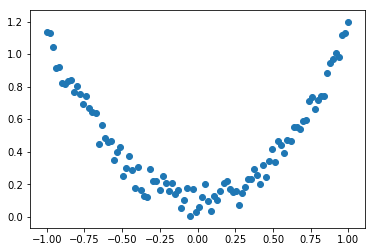

In [111]:
plt.scatter(x.data.numpy(),y.data.numpy())
plt.show()

In [112]:
# 定义网络
# 继承 torch.nn.Module 模块
# 最需要用到的两个功能 __init__ , forward

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net,self).__init__() #继承
        
        self.hidden = torch.nn.Linear(n_feature, n_hidden)
        self.predict = torch.nn.Linear(n_hidden, n_output)
    
    def forward(self, x):
        x = torch.relu(self.hidden(x))
        x = self.predict(x)
        return x

net = Net(1, 10, 1)  # 输入：1个，神经元：10个，输出：1个
print(net)

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


In [0]:
# 优化神经网络
optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
# loss_func = func.mse_loss() # 均方差loss

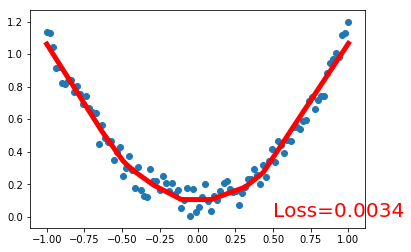

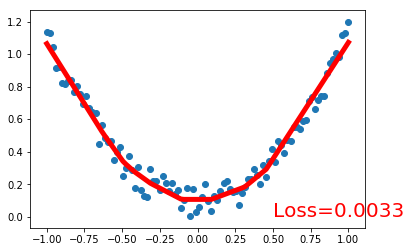

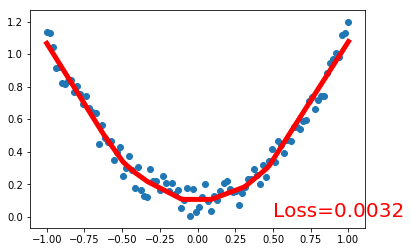

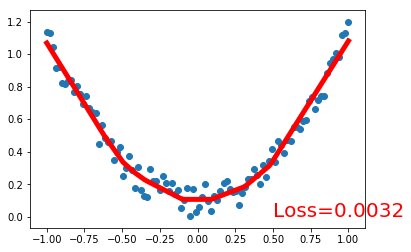

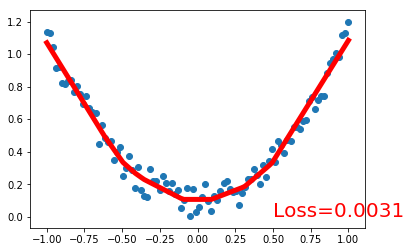

In [140]:
# 训练
for t in range(100):
    prediction = net(x)
    
    loss = func.mse_loss(prediction,y) # 预测值和真实值的位置不能变
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 可视化
    if t%20 == 0:
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(),prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5,0,'Loss=%.4f'%loss.data.numpy(),fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()